<a href="https://colab.research.google.com/github/PeKkaPie95/GenAI-Creative-Text-and-Image-Generation/blob/dataCollectionAndProcessing/datasetBeGood2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/processed_poems.csv'
df = pd.read_csv(file_path)

# Principal Component Analysis (PCA)

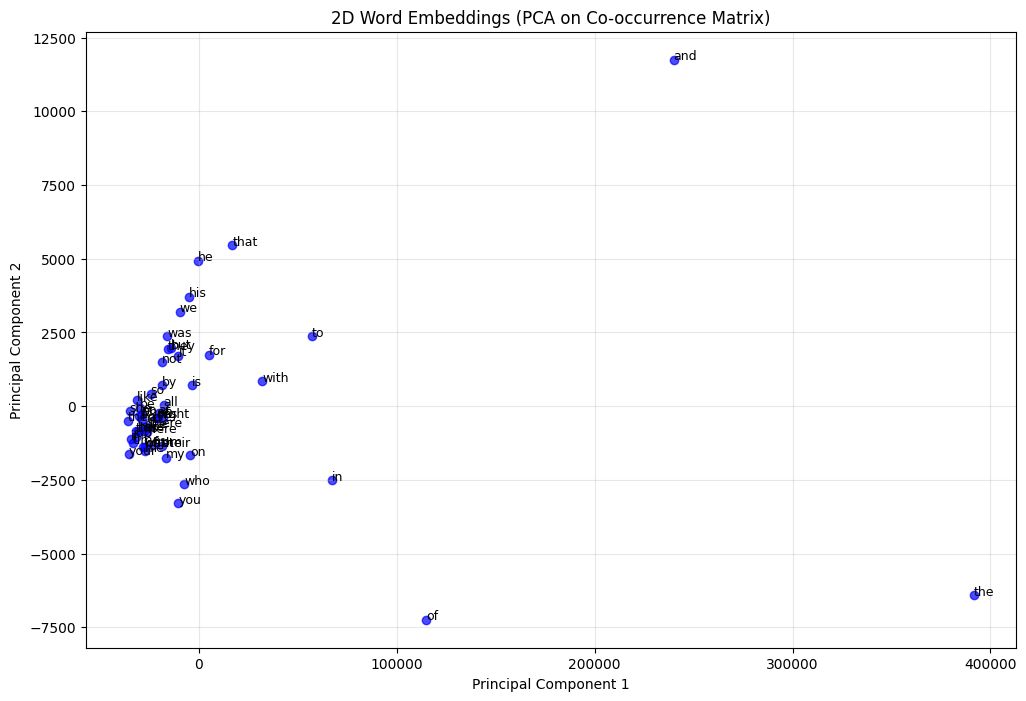

In [ ]:
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Load dataset
file_path = '/content/processed_poems.csv'
dataset = pd.read_csv(file_path)

# Extract sentences from the dataset
sentences = dataset['Poem']  # Replace with the actual column name

# Tokenize sentences and construct co-occurrence matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
co_occurrence_matrix = (X.T @ X).toarray()

# Get words and their frequencies
words = vectorizer.get_feature_names_out()
word_counts = np.array(X.sum(axis=0)).flatten()

# Select the most frequent words
most_common_words_idx = np.argsort(-word_counts)[:50]  # Top 50 words
selected_matrix = co_occurrence_matrix[most_common_words_idx][:, most_common_words_idx]
selected_words = words[most_common_words_idx]

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(selected_matrix)

# Plot the 2D word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', alpha=0.7)

# Annotate the points with the corresponding words
for i, word in enumerate(selected_words):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word, fontsize=9)

plt.title('2D Word Embeddings (PCA on Co-occurrence Matrix)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(alpha=0.3)
plt.show()


# Comparing results with existing 2D embeddings

[==================================================] 100.0% 1662.8/1662.8MB downloaded


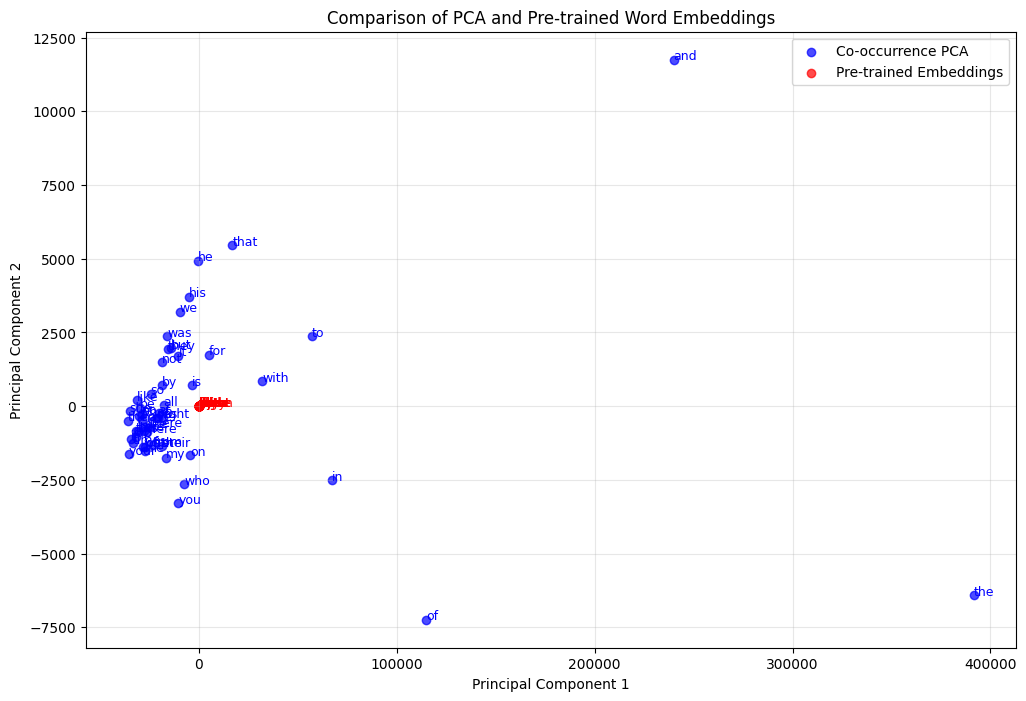

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec embeddings (can replace with GloVe or FastText)
word2vec = api.load("word2vec-google-news-300")

# Filter pre-trained embeddings for the selected words
pretrained_embeddings = []
filtered_words = []
for word in selected_words:
    if word in word2vec:
        pretrained_embeddings.append(word2vec[word])
        filtered_words.append(word)

# Reduce pre-trained embeddings to 2D
pretrained_embeddings = np.array(pretrained_embeddings)
pretrained_reduced = PCA(n_components=2).fit_transform(pretrained_embeddings)

# Plot PCA embeddings (from co-occurrence matrix) and pre-trained embeddings
plt.figure(figsize=(12, 8))

# Plot co-occurrence PCA embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Co-occurrence PCA', alpha=0.7)
for i, word in enumerate(selected_words):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word, fontsize=9, color='blue')

# Plot pre-trained embeddings
plt.scatter(pretrained_reduced[:, 0], pretrained_reduced[:, 1], c='red', label='Pre-trained Embeddings', alpha=0.7)
for i, word in enumerate(filtered_words):
    plt.text(pretrained_reduced[i, 0], pretrained_reduced[i, 1], word, fontsize=9, color='red')

plt.title('Comparison of PCA and Pre-trained Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Analysis: Differences in Semantic and Syntactic Relationships
# 1. Pre-trained embeddings often cluster words based on semantic similarities (e.g., synonyms or topical relationships).
# 2. Co-occurrence-based embeddings focus on syntactic relationships, influenced by sentence-level co-usage.
# 3. Visualizing the spread and clustering can provide insights into these differences.
